In [1]:
#Import libraries
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt


In [2]:
#import dataset
dataset=pd.read_csv('Clustering data.csv')

In [3]:
#extract year,day and month from date
dataset['Open Date'] = pd.to_datetime(dataset['Open Date']) 
dataset['dayOfWeek'] = dataset['Open Date'].dt.day_name() 
dataset['month'] = dataset['Open Date'].dt.month
dataset['year'] = dataset['Open Date'].dt.year

In [4]:
#impute values based on the legend 
dataset['Pharmacy_IND'] = dataset['Pharmacy_IND'].replace(['N','Y'],[0,1])
dataset['Pickup_IND'] = dataset['Pickup_IND'].replace(['N','Y'],[0,1])
dataset['SFS_IND'] = dataset['SFS_IND'].replace(['N','Y'],[0,1])
dataset['COMP_IND'] = dataset['COMP_IND'].replace(['-'],[np.nan])
dataset['COMP_IND'] = dataset['COMP_IND'].replace(['N','Y'],[0,1])
dataset['College_STORE_IND'] = dataset['College_STORE_IND'].replace(['N','Y'],[0,1])
dataset['dayOfWeek'] = dataset['dayOfWeek'].replace(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],[0,0,0,0,0,1,1])


In [5]:
#selecting required columns
data=dataset[['StoreNum','State Provinc','Market','Region','Locality Code','Climate Code','Pharmacy_IND','Pickup_IND','SFS_IND','COMP_IND','College_STORE_IND','INCOME_CD','ETHNICITY_CD','dayOfWeek','month','year']]

In [6]:
data.isna().mean().round(4) * 100

StoreNum              0.00
State Provinc         0.00
Market                0.00
Region               47.54
Locality Code        61.62
Climate Code         64.08
Pharmacy_IND         17.25
Pickup_IND            0.35
SFS_IND               8.80
COMP_IND             60.21
College_STORE_IND    17.25
INCOME_CD            61.27
ETHNICITY_CD         61.62
dayOfWeek             0.00
month                 0.00
year                  0.00
dtype: float64

In [7]:
#Select requred columns for clustering
master_data=data.drop(['StoreNum','State Provinc','Market','Region','month','year','Locality Code','Pickup_IND','SFS_IND','COMP_IND','College_STORE_IND','dayOfWeek'],axis=1)

In [8]:
master_data.head()

,Climate Code,Pharmacy_IND,INCOME_CD,ETHNICITY_CD
0,3.0,0.0,2.0,3.0
1,2.0,0.0,1.0,1.0
2,2.0,0.0,2.0,2.0
3,3.0,0.0,2.0,2.0
4,2.0,0.0,2.0,2.0


In [9]:
# drop null values
master_data=master_data.dropna()
master_data.shape

(102, 4)

In [10]:
#convert data frame in to array of required elements
X = master_data.iloc[:,:].values


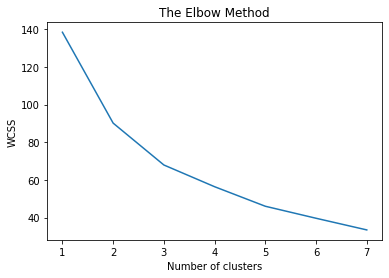

In [11]:
#Elbow method to determine optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
#Predict the cluster type using K means clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [13]:
print(y_kmeans)

[1 3 3 4 3 0 1 2 0 4 3 3 1 2 1 3 1 2 3 1 3 3 2 0 0 3 2 4 4 3 2 1 3 3 3 0 4
 0 3 1 3 3 4 4 2 3 2 3 0 0 0 4 3 1 3 0 4 2 3 3 3 4 2 2 3 1 3 3 3 3 1 0 1 3
 2 4 0 2 1 3 0 4 4 0 0 4 0 1 3 0 0 0 0 0 1 0 0 1 0 1 1 2]


In [14]:
master_data.insert(0,'cluster',y_kmeans)